In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# with monte carlo simulation

num_simulation = 10000
consumption_growth = np.zeros(num_simulation)
for i in range(num_simulation):
    mu, sigma = 0,1
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu <0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu)

In [8]:


'''---Part 1:Hansen-Jagannathon Bound---'''

# create gamma array from 1 to 4 with increment 0.1

start_value = 1.0
end_value = 4.1  # We add 0.1 to include the end value
increment = 0.1
gamma = np.arange(start_value, end_value, increment)
num_gamma = len(gamma)
delta = 0.99
HJ_bound = np.zeros(num_gamma)
mean_M = np.zeros(num_gamma)
std_M = np.zeros(num_gamma)

# Calculate the M 

for i in range(num_gamma):
    
    M = delta*consumption_growth**(-gamma[i])
    std_M[i] = np.std(M)
    mean_M[i] = np.mean(M) 
    HJ_bound[i] = std_M[i]/mean_M[i]
    
    
HJ_bound


array([0.07195439, 0.08078501, 0.08996507, 0.09950909, 0.10943206,
       0.11974948, 0.13047733, 0.14163212, 0.15323085, 0.16529106,
       0.1778308 , 0.19086867, 0.20442379, 0.21851581, 0.23316492,
       0.24839186, 0.26421788, 0.28066476, 0.29775482, 0.31551086,
       0.3339562 , 0.35311463, 0.37301044, 0.39366833, 0.41511344,
       0.43737131, 0.46046786, 0.48442932, 0.50928223, 0.53505339,
       0.56176978])

In [9]:
data = {
    'γ': gamma,
    'μM': mean_M,
    'σM': std_M,
    'μM/σM':HJ_bound
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,γ,μM,σM,μM/σM
0,1.0,0.979813,0.070502,0.071954
1,1.1,0.979046,0.079092,0.080785
2,1.2,0.978332,0.088016,0.089965
3,1.3,0.977672,0.097287,0.099509
4,1.4,0.977069,0.106923,0.109432
5,1.5,0.976524,0.116938,0.119749
6,1.6,0.976039,0.127351,0.130477
7,1.7,0.975617,0.138179,0.141632
8,1.8,0.975260,0.149440,0.153231
9,1.9,0.974970,0.161154,0.165291


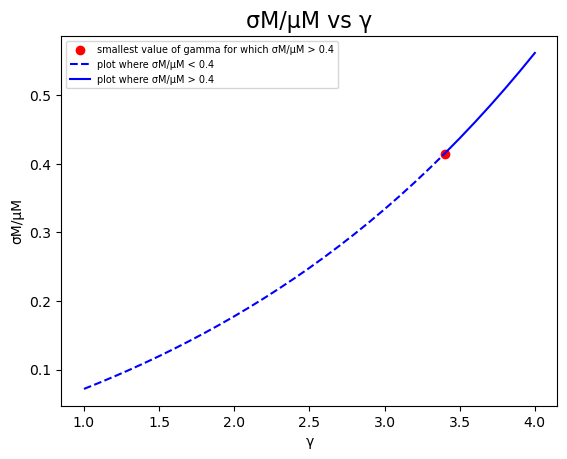

In [10]:
# Label the axes
plt.xlabel('γ')
plt.ylabel('σM/μM')

# Find the smallest value of γ where σM/μM > 0.4
condition = HJ_bound > 0.4
SM_idx = np.min(np.argwhere(HJ_bound>0.4))
treshold_gamma = gamma[SM_idx]

# Find the HJ bound smallest value >0.4
treshold_HJ = HJ_bound[np.min(np.argwhere(HJ_bound >0.4))]

gamma_ns, HJ_bound_ns = gamma[:SM_idx+1], HJ_bound[:SM_idx+1]
gamma_s, HJ_bound_s = gamma[SM_idx:], HJ_bound[SM_idx:]

# Plot points where σM/μM > 0.4
plt.scatter(treshold_gamma, treshold_HJ , color='red', label='smallest value of gamma for which σM/μM > 0.4')

# plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).
plt.plot(gamma_ns,HJ_bound_ns,color='blue',linestyle='--',label='plot where σM/μM < 0.4')
plt.plot(gamma_s,HJ_bound_s, color='blue',label='plot where σM/μM > 0.4')


plt.title('σM/μM vs γ',fontsize=16)
plt.legend(loc='upper left', fontsize=7)

In [11]:
# Calculate μM and σM for each value of γ

mean_M = M.mean()


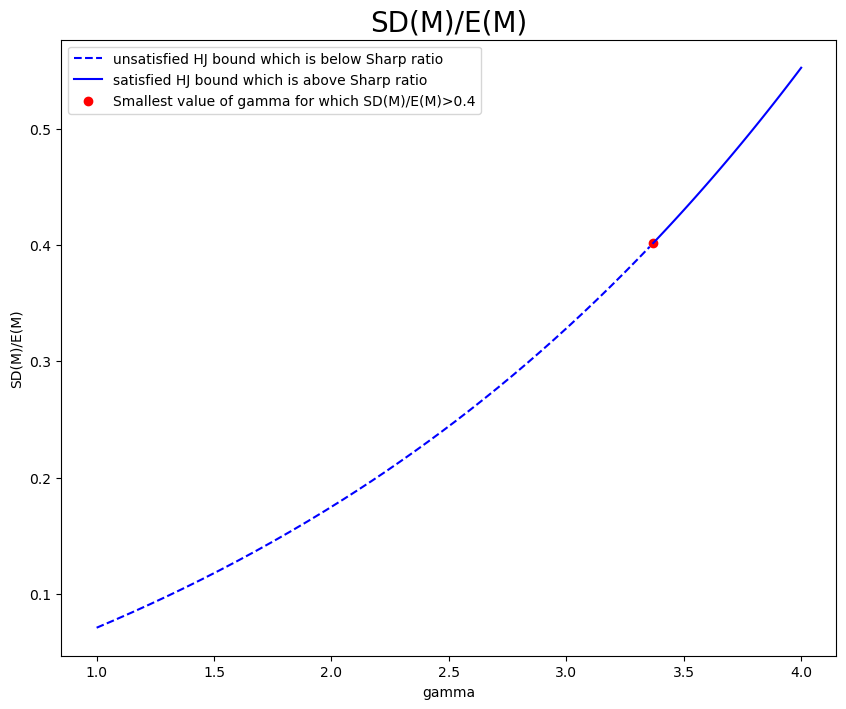

Text(0.5, 1.0, 'Equity Premium')

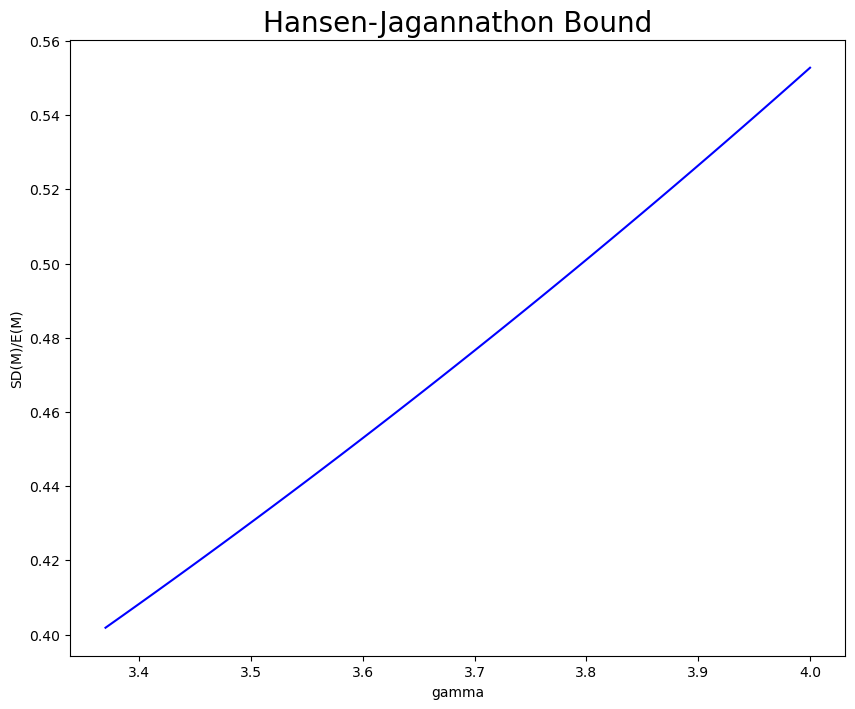

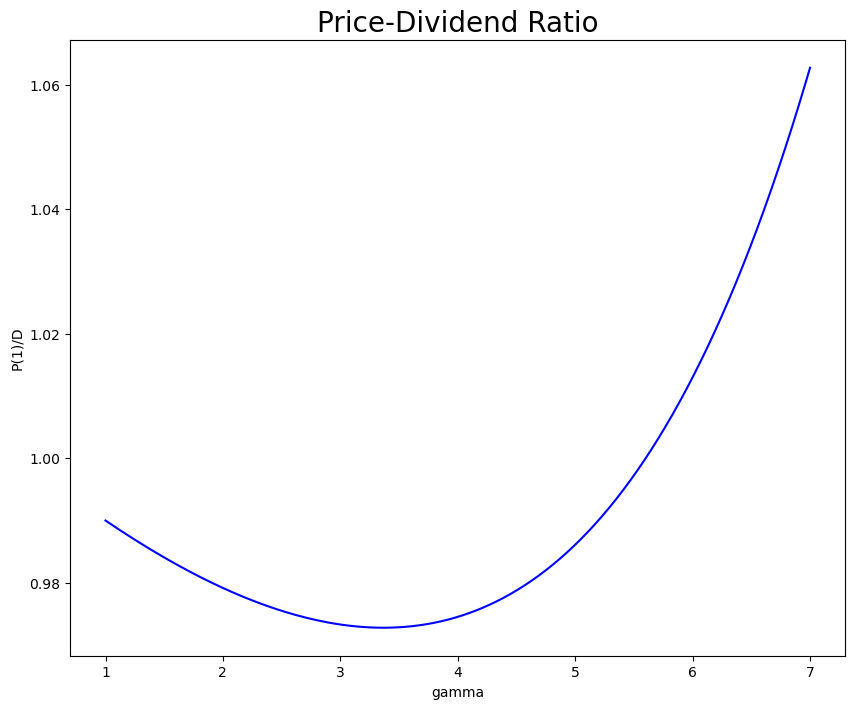

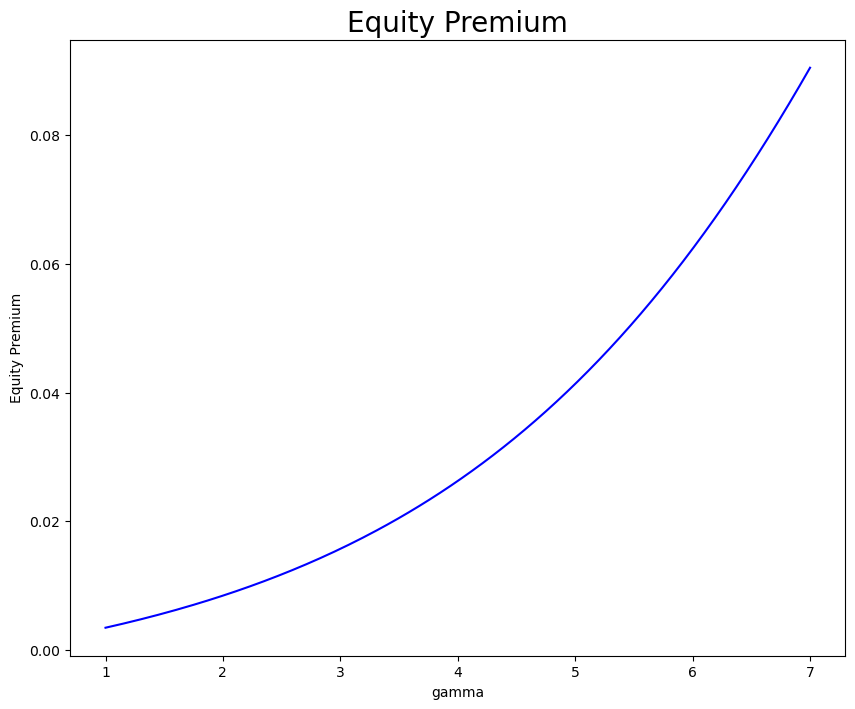

In [12]:
"""
Multi-Period Asset Pricing

Suppose that consumption growth has a lognormal distribution with the possibility of rare disasters:
ln g̃ = 0.02 + 0.02*ϵ̃  + ν̃ 
Here epsilon is a standard normal random variable, while nu is an independent random variable 
that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%). 
Simulate epsilon with 10,000 random draws from a standard normal distribution, 
and simulate nu with 10,000 random draws from a standard uniform distribution. 

Part 1: Hansen–Jagannathan Bound
Use the simulated distribution of consumption growth to calculate the pricing kernel for power utility:
M̃ = 0.99*g̃**(−γ) , for gamma in the range [1,4]. 
Calculate the mean and standard deviation of the pricing kernel for all values of gamma. 
Plot the ratio SD(M)/E(M) (on the vertical axis) vs gamma (on the horizontal axis). 
Take note of the smallest value of gamma for which SD(M)/E(M) > 0.4 
(i.e., for which the Hansen–Jagannathan bound is satisfied). 
Briefly explain the economic significance of this result.

Part 2: Price-Dividend Ratio
Use the simulated distribution of consumption growth to find the (constant) price-dividend ratio 
for the first equity claim, for gamma in the range [1, 7]:
P(1)/D = E[0.99*g̃**(1−γ)], Plot P(1)/D (on the vertical axis) vs gamma (on the horizontal axis).

Part 3: Equity Premium
Use the simulated distribution of consumption growth to find the expected market return, 
for gamma in the range [1, 7]:
E[R̃(m)] = D/P(1)*E[g̃]
Use the simulated distribution of consumption growth to find the risk-free rate, 
for gamma in the range [1,7]:
R(f) = 1/E[0.99*g̃**(−γ)]
Plot the equity premium (on the vertical axis) vs gamma (on the horizontal axis).

Please submit your results (including graphs and qualitative discussion of economic significance) 
and programming code to the submission folder for Homework 4 
before the start of the lecture on Thursday, 14 November.
"""
import numpy as np
import matplotlib.pyplot as plt

num_c = 10000
consumption_growth = np.zeros(num_c)
for i in range(num_c):
    mu, sigma = 0,1
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu <0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu)

'''---Part 1:Hansen-Jagannathon Bound---'''
num_g = 201
delta = 0.99
gamma1 = np.linspace(1,4,num_g)
HJ_bound = np.zeros(num_g)
for i in range(num_g):
    HJ_bound[i] = np.std(delta*consumption_growth**(-gamma1[i]))/np.mean(delta*consumption_growth**(-gamma1[i]))
SM_idx = np.min(np.argwhere(HJ_bound>0.4))
SM_value = HJ_bound[np.min(np.argwhere(HJ_bound >0.4))]
gamma1_ns, HJ_bound_ns = gamma1[:SM_idx], HJ_bound[:SM_idx]
gamma1_s, HJ_bound_s = gamma1[SM_idx:], HJ_bound[SM_idx:]

fig,ax1 = plt.subplots(figsize=(10,8))
ax1.plot(gamma1_ns,HJ_bound_ns,c='b',ls='--',label='unsatisfied HJ bound which is below Sharp ratio')
ax1.plot(gamma1_s,HJ_bound_s, c='b',label='satisfied HJ bound which is above Sharp ratio')
plt.scatter(gamma1[SM_idx],SM_value,c='r',label='Smallest value of gamma for which SD(M)/E(M)>0.4')
plt.xlabel('gamma')
plt.ylabel('SD(M)/E(M)')
plt.title('SD(M)/E(M)',fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(gamma1_s,HJ_bound_s,c='b')
plt.xlabel('gamma')
plt.ylabel('SD(M)/E(M)')
plt.title('Hansen-Jagannathon Bound',fontsize=20)

'''---Part 2:Price-Dividend Ratio---'''
gamma2 = np.linspace(1,7,num_g)
PD_ratio = np.zeros(num_g)
for i in range(num_g):
    PD_ratio[i] = np.mean(delta*consumption_growth**(1-gamma2[i]))

fig,ax2 = plt.subplots(figsize=(10,8))
ax2.plot(gamma2,PD_ratio,c='b')
plt.xlabel('gamma')
plt.ylabel('P(1)/D')
plt.title('Price-Dividend Ratio',fontsize=20)

'''---Part 3:Equity Premium---'''
mkt_rt, rf, equity_premium = np.zeros(num_g), np.zeros(num_g), np.zeros(num_g)
for i in range(num_g):
    mkt_rt[i] = np.mean(consumption_growth)/PD_ratio[i]
    rf[i] = 1/np.mean(delta*consumption_growth**(-gamma2[i]))
    equity_premium[i] = np.log(mkt_rt[i])-np.log(rf[i])

fig,ax3 = plt.subplots(figsize=(10,8))
ax3.plot(gamma2,equity_premium,c='b')
plt.xlabel('gamma')
plt.ylabel('Equity Premium')
plt.title('Equity Premium',fontsize=20)
    